## Gene-Feature Importance Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
# data = pd.read_csv("gene_data.csv", header = 0, index_col = 0)
data = pd.read_csv("gene_data_PDWD.tsv", sep ='\t', header = 0, index_col = 0)
data = data.T
data = np.log(data +1)
y = [ 0 if d.split('_')[1] == 'WD' else 1 for d in data.index ]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
    
    
# create a random forest classifier with 100 trees
rfc =  RandomForestClassifier(n_estimators=100, random_state = 2)

# fit the classifier to your data
rfc.fit(X_train, y_train)

# predict using the trained classifier
y_pred = rfc.predict(X_test)

print('Accuracy of RFC classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of RFC classifier on test set: 1.00


### Gini importance (RFC) & Gene importance from Logistic Regression

In [ ]:
importances = rfc.feature_importances_

features = list(data.columns)


In [ ]:
df = pd.DataFrame(zip(features, importances), columns=["Gene","Feature Importance"]).sort_values(by = "Feature Importance")
df
df.to_csv('gini_importance.csv', index=False)

In [ ]:
threshold = 0.001
filtered_genes_threshold = np.array(df.loc[np.abs(df['Feature Importance']) >= threshold, 'Gene'])
filtered_genes_threshold


array(['JAG2', 'CSF1R', 'GADD45B', 'GADD45A', 'EPO', 'JAK2', 'BIRC3',
       'VEGFA', 'NUMBL', 'PPP3R2', 'LAMA1', 'SOCS1', 'C10orf76', 'SPRY2',
       'FLNA', 'FGF2', 'HES1', 'IL1R2', 'NOL7', 'WNT10B', 'IFNA17',
       'SKP1', 'NOG', 'IL6', 'NFKB1', 'RNF43', 'PCNA', 'PIK3CD', 'APC',
       'MAPK8IP2', 'CEBPA', 'RASAL1', 'DDIT4', 'POLE2', 'GADD45G', 'TNC',
       'CUL1', 'PRKCA', 'NR4A3', 'SETBP1', 'EYA1', 'CDKN2C', 'MPO',
       'EDC3', 'DNMT1', 'CASP10', 'PRDM1', 'PRL', 'HSP90B1', 'MTOR',
       'WNT4', 'BRAF', 'SMAD2', 'CCND2', 'PDGFC', 'RPA3', 'GNA11',
       'FGF12', 'USP39', 'POLR2D', 'PKMYT1', 'IL8', 'ITGA8', 'SOS2',
       'IL10', 'RPS6KA6', 'CD14', 'MYB', 'HIST1H3H', 'MAPK10', 'FGF17',
       'FANCB', 'MCM5', 'WNT3', 'ALKBH2', 'PBX1', 'CHEK2', 'HOXA10',
       'BRCA2', 'UBE2T', 'CHEK1', 'CCNE1', 'ZBTB16', 'CACNA1C', 'CCNE2',
       'FGF14', 'CCNB1', 'PPP2R2B', 'RET', 'CCNB3', 'RASA4', 'MCM4',
       'E2F1', 'CACNA2D1', 'EZH2', 'GRIN2A', 'FBXW7', 'SFN', 'BRCA1',
       'FGFR3', 

In [ ]:
lr_set = {'CAMK2B', 'CACNA1D', 'WNT4', 'CACNA1H', 'MAPK10', 'GRIA3', 'PAK3',
       'FGF14', 'CACNB2', 'ZBTB16', 'BAIAP3', 'RASA4', 'MAPK8IP2',
       'MAPK8IP1', 'CCND2', 'DTX3', 'CXXC4', 'CACNA2D1', 'PRKCG', 'ARNT2',
       'PAK7', 'TSPAN7', 'CACNA1C', 'COL4A3', 'EPOR', 'TNR', 'NPM2',
       'PPP2R2B', 'PLA2G2A', 'RAD51', 'HELLS', 'CDC25C', 'MCM2', 'UBE2T',
       'CCNE1', 'COL11A1', 'MCM4', 'HOXA11', 'SPP1', 'TTK', 'EZH2',
       'DKK4', 'HIST1H3H', 'BRIP1', 'CCNB1', 'MYB', 'IL8', 'LAMC2',
       'HIST1H3G', 'DKK1', 'CDC6', 'E2F1', 'CHEK1', 'HIST1H3B', 'FANCA',
       'ZIC2', 'SFN'}
       
rfc_set = {'JAG2', 'CSF1R', 'GADD45B', 'GADD45A', 'EPO', 'JAK2', 'BIRC3',
       'VEGFA', 'NUMBL', 'PPP3R2', 'LAMA1', 'SOCS1', 'C10orf76', 'SPRY2',
       'FLNA', 'FGF2', 'HES1', 'IL1R2', 'NOL7', 'WNT10B', 'IFNA17',
       'SKP1', 'NOG', 'IL6', 'NFKB1', 'RNF43', 'PCNA', 'PIK3CD', 'APC',
       'MAPK8IP2', 'CEBPA', 'RASAL1', 'DDIT4', 'POLE2', 'GADD45G', 'TNC',
       'CUL1', 'PRKCA', 'NR4A3', 'SETBP1', 'EYA1', 'CDKN2C', 'MPO',
       'EDC3', 'DNMT1', 'CASP10', 'PRDM1', 'PRL', 'HSP90B1', 'MTOR',
       'WNT4', 'BRAF', 'SMAD2', 'CCND2', 'PDGFC', 'RPA3', 'GNA11',
       'FGF12', 'USP39', 'POLR2D', 'PKMYT1', 'IL8', 'ITGA8', 'SOS2',
       'IL10', 'RPS6KA6', 'CD14', 'MYB', 'HIST1H3H', 'MAPK10', 'FGF17',
       'FANCB', 'MCM5', 'WNT3', 'ALKBH2', 'PBX1', 'CHEK2', 'HOXA10',
       'BRCA2', 'UBE2T', 'CHEK1', 'CCNE1', 'ZBTB16', 'CACNA1C', 'CCNE2',
       'FGF14', 'CCNB1', 'PPP2R2B', 'RET', 'CCNB3', 'RASA4', 'MCM4',
       'E2F1', 'CACNA2D1', 'EZH2', 'GRIN2A', 'FBXW7', 'SFN', 'BRCA1',
       'FGFR3', 'CDC6', 'CDC25C', 'RFC4', 'POLD1', 'DKK1', 'PAK7',
       'RAD51', 'ZIC2', 'GNG7', 'MCM2', 'TTK', 'GRIA3', 'HIST1H3B',
       'CACNB2', 'PAK3', 'BRIP1', 'CACNA1H', 'CAMK2B', 'FANCA'}

lr_rfc = lr_set.intersection(rfc_set)
print("LR & RFC: " + (" ").join(lr_rfc))

LR & RFC: IL8 HIST1H3B EZH2 GRIA3 MAPK8IP2 CAMK2B FANCA MCM4 CDC6 PAK3 RAD51 ZBTB16 CACNB2 MYB MCM2 WNT4 DKK1 FGF14 PPP2R2B CDC25C CCNB1 TTK CACNA1C HIST1H3H CCNE1 CHEK1 CACNA2D1 CACNA1H RASA4 PAK7 UBE2T MAPK10 BRIP1 SFN CCND2 E2F1 ZIC2


### SHAP analysis

In [ ]:
import shap

explainer = shap.TreeExplainer(rfc)
#explainer

/root/venv/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/root/venv/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_pa

In [ ]:
shap_values = explainer.shap_values(X_test)
#shap_values

In [ ]:
#shap_values[0]
#shap_values[1]

In [ ]:
#np.array( shap_values )[0,:,data.columns.tolist().index('FANCA')]

In [ ]:
#X_test.index

In [ ]:
pd.DataFrame({'SHAP':np.array( shap_values )[0,:,data.columns.tolist().index('FANCA')]}, index = X_test.index)



,SHAP
SC15-615_PD,-0.030873
SO13-7742_WD,0.018308
SC14-3857_WD,0.016701
SC14-469_PD,-0.030873
SO13-7790_PD,-0.030873
SC14-3805_WD,0.018308
SC14-2414_WD,0.018308
SO11-5496_WD,-0.021136


In [ ]:
shap_imp = [  "{}:{:.4f}".format( i, j ) for i, j in (zip( X_test.columns, np.abs( shap_values[0] ).mean(0).round(2) )) ]

#shap_imp



### SHAP 0-WD importance

In [ ]:
sorted_genes_weights = sorted(zip(X_test.columns, shap_values[0].mean(0).round(5)), key=lambda x: x[1])

highest_genes = sorted_genes_weights[:10] + sorted_genes_weights[-10:]

gene_features = [g[0] for g in highest_genes]
gene_weights = [g[1] for g in highest_genes]

weights = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])
weights
#sorted_genes_weights[-20:]

,Gene,Feature Importance
0,GNG7,-0.00559
1,TTK,-0.00529
2,FANCA,-0.00527
3,DNMT1,-0.00484
4,HIST1H3B,-0.00481
5,CDC6,-0.00322
6,WNT4,-0.00315
7,BRCA1,-0.00252
8,RPA3,-0.00239
9,SFN,-0.00221


### SHAP 1-PD importance

In [ ]:
sorted_genes_weights = sorted(zip(X_test.columns, shap_values[1].mean(0).round(5)), key=lambda x: x[1])

highest_genes = sorted_genes_weights[:10] + sorted_genes_weights[-10:]

gene_features = [g[0] for g in highest_genes] #for g in sorted_genes_weights
gene_weights = [g[1] for g in highest_genes] 

weights = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])

weights.to_csv('shap1_importance.csv', index=False)


weights

,Gene,Feature Importance
0,CAMK2B,-0.00580
1,PRL,-0.00394
2,BRIP1,-0.00346
3,CCNE1,-0.00321
4,PAK3,-0.00276
5,PAK7,-0.00275
6,DKK1,-0.00271
7,SETBP1,-0.00249
8,HOXA10,-0.00244
9,RFC4,-0.00235


In [ ]:
#sorted_genes_weights

gene_features = [g[0] for g in sorted_genes_weights]
gene_weights = [g[1] for g in sorted_genes_weights]

df = pd.DataFrame(zip(gene_features, gene_weights), columns=["Gene","Feature Importance"])
df

,Gene,Feature Importance
0,CAMK2B,-0.00580
1,PRL,-0.00394
2,BRIP1,-0.00346
3,CCNE1,-0.00321
4,PAK3,-0.00276
...,...,...
779,HIST1H3B,0.00481
780,DNMT1,0.00484
781,FANCA,0.00527
782,TTK,0.00529


In [ ]:
threshold = 0.001
filtered_genes_threshold = np.array(df.loc[np.abs(df['Feature Importance']) >= threshold, 'Gene'])
filtered_genes_threshold

array(['CAMK2B', 'PRL', 'BRIP1', 'CCNE1', 'PAK3', 'PAK7', 'DKK1',
       'SETBP1', 'HOXA10', 'RFC4', 'CCND2', 'IL10', 'SOCS1', 'ZIC2',
       'MCM5', 'GADD45G', 'MTOR', 'MCM2', 'RASA4', 'CACNA1H', 'EZH2',
       'PRKCA', 'ZBTB16', 'MCM4', 'SOS2', 'FBXW7', 'CACNB2', 'GADD45A',
       'SMAD2', 'RPS6KA6', 'PDGFC', 'NOG', 'CHEK2', 'MYB', 'RNF43',
       'IFNA17', 'NFKB1', 'VEGFA', 'RET', 'CCNE2', 'CDKN2C', 'GRIA3',
       'POLD1', 'PKMYT1', 'MPO', 'CHEK1', 'CCNB3', 'ALKBH2', 'FANCB',
       'E2F1', 'CUL1', 'WNT10B', 'PBX1', 'FGF14', 'SFN', 'RPA3', 'BRCA1',
       'WNT4', 'CDC6', 'HIST1H3B', 'DNMT1', 'FANCA', 'TTK', 'GNG7'],
      dtype=object)

In [ ]:
shap_set = {'CAMK2B', 'PRL', 'BRIP1', 'CCNE1', 'PAK3', 'PAK7', 'DKK1',
       'SETBP1', 'HOXA10', 'RFC4', 'CCND2', 'IL10', 'SOCS1', 'ZIC2',
       'MCM5', 'GADD45G', 'MTOR', 'MCM2', 'RASA4', 'CACNA1H', 'EZH2',
       'PRKCA', 'ZBTB16', 'MCM4', 'SOS2', 'FBXW7', 'CACNB2', 'GADD45A',
       'SMAD2', 'RPS6KA6', 'PDGFC', 'NOG', 'CHEK2', 'MYB', 'RNF43',
       'IFNA17', 'NFKB1', 'VEGFA', 'RET', 'CCNE2', 'CDKN2C', 'GRIA3',
       'POLD1', 'PKMYT1', 'MPO', 'CHEK1', 'CCNB3', 'ALKBH2', 'FANCB',
       'E2F1', 'CUL1', 'WNT10B', 'PBX1', 'FGF14', 'SFN', 'RPA3', 'BRCA1',
       'WNT4', 'CDC6', 'HIST1H3B', 'DNMT1', 'FANCA', 'TTK', 'GNG7'}

In [ ]:
lr_set = {'CAMK2B', 'WNT4', 'CACNA1D', 'CACNA1H', 'FGF14', 'PAK3', 'CACNB2',
       'BAIAP3', 'GRIA3', 'MAPK10', 'RASA4', 'MAPK8IP2', 'ZBTB16',
       'PRKCG', 'MAPK8IP1', 'DTX3', 'CXXC4', 'CACNA2D1', 'CCND2', 'PAK7',
       'CACNA1C', 'COL4A3', 'ARNT2', 'EPOR', 'TSPAN7', 'PPP2R2B', 'TNR',
       'PROM1', 'FOS', 'NPM2', 'CACNG6', 'SHC2', 'ID4', 'MAPT', 'SETBP1',
       'CDC25A', 'WNT10A', 'FST', 'HOXA9', 'CDC25C', 'RAD51', 'COL11A1',
       'HOXA10', 'UBE2T', 'HELLS', 'TTK', 'SPP1', 'MCM2', 'HOXA11',
       'EZH2', 'DKK4', 'PLA2G2A', 'CCNE1', 'IL8', 'MCM4', 'HIST1H3H',
       'CCNB1', 'HIST1H3G', 'MYB', 'BRIP1', 'CDC6', 'DKK1', 'E2F1',
       'CHEK1', 'LAMC2', 'FANCA', 'HIST1H3B', 'ZIC2', 'SFN'}

rfc_set = {'JAG2', 'CSF1R', 'GADD45B', 'GADD45A', 'EPO', 'JAK2', 'BIRC3',
       'VEGFA', 'NUMBL', 'PPP3R2', 'LAMA1', 'SOCS1', 'C10orf76', 'SPRY2',
       'FLNA', 'FGF2', 'HES1', 'IL1R2', 'NOL7', 'WNT10B', 'IFNA17',
       'SKP1', 'NOG', 'IL6', 'NFKB1', 'RNF43', 'PCNA', 'PIK3CD', 'APC',
       'MAPK8IP2', 'CEBPA', 'RASAL1', 'DDIT4', 'POLE2', 'GADD45G', 'TNC',
       'CUL1', 'PRKCA', 'NR4A3', 'SETBP1', 'EYA1', 'CDKN2C', 'MPO',
       'EDC3', 'DNMT1', 'CASP10', 'PRDM1', 'PRL', 'HSP90B1', 'MTOR',
       'WNT4', 'BRAF', 'SMAD2', 'CCND2', 'PDGFC', 'RPA3', 'GNA11',
       'FGF12', 'USP39', 'POLR2D', 'PKMYT1', 'IL8', 'ITGA8', 'SOS2',
       'IL10', 'RPS6KA6', 'CD14', 'MYB', 'HIST1H3H', 'MAPK10', 'FGF17',
       'FANCB', 'MCM5', 'WNT3', 'ALKBH2', 'PBX1', 'CHEK2', 'HOXA10',
       'BRCA2', 'UBE2T', 'CHEK1', 'CCNE1', 'ZBTB16', 'CACNA1C', 'CCNE2',
       'FGF14', 'CCNB1', 'PPP2R2B', 'RET', 'CCNB3', 'RASA4', 'MCM4',
       'E2F1', 'CACNA2D1', 'EZH2', 'GRIN2A', 'FBXW7', 'SFN', 'BRCA1',
       'FGFR3', 'CDC6', 'CDC25C', 'RFC4', 'POLD1', 'DKK1', 'PAK7',
       'RAD51', 'ZIC2', 'GNG7', 'MCM2', 'TTK', 'GRIA3', 'HIST1H3B',
       'CACNB2', 'PAK3', 'BRIP1', 'CACNA1H', 'CAMK2B', 'FANCA'}

lr_rfc = lr_set.intersection(rfc_set)
print("LR & RFC: " + (" ").join(lr_rfc))

lr_shap = lr_set.intersection(shap_set)
print("LR & SHAP: " + (" ").join(lr_shap))

rfc_shap = rfc_set.intersection(shap_set)
print("RFC & SHAP: " + (" ").join(rfc_shap))

lr_rfc_shap = lr_set.intersection(rfc_shap)
print("LR & RFC & SHAP: " + (" ").join(lr_rfc_shap))

LR & RFC: SETBP1 IL8 HIST1H3B EZH2 GRIA3 MAPK8IP2 CAMK2B FANCA MCM4 CDC6 PAK3 RAD51 ZBTB16 CACNB2 MYB MCM2 WNT4 FGF14 DKK1 PPP2R2B CCNB1 CDC25C TTK CACNA1C HOXA10 HIST1H3H CHEK1 CCNE1 CACNA2D1 CACNA1H RASA4 PAK7 UBE2T MAPK10 BRIP1 SFN CCND2 E2F1 ZIC2
LR & SHAP: SETBP1 HIST1H3B EZH2 GRIA3 CAMK2B FANCA MCM4 CDC6 PAK3 ZBTB16 CACNB2 MYB MCM2 DKK1 FGF14 WNT4 TTK HOXA10 CHEK1 CCNE1 CACNA1H RASA4 PAK7 BRIP1 SFN CCND2 E2F1 ZIC2
RFC & SHAP: CUL1 FANCB SETBP1 SOS2 CDKN2C PRKCA HIST1H3B RNF43 SOCS1 GNG7 EZH2 GRIA3 CAMK2B RPS6KA6 FBXW7 PBX1 FANCA MCM4 MPO PAK3 CCNB3 ZBTB16 CACNB2 CDC6 BRCA1 MYB NFKB1 MCM2 SMAD2 PKMYT1 DKK1 ALKBH2 FGF14 WNT4 POLD1 CCNE2 TTK RFC4 PRL PDGFC HOXA10 GADD45G CHEK1 IL10 CCNE1 IFNA17 CACNA1H RASA4 PAK7 RPA3 RET MCM5 WNT10B CHEK2 BRIP1 GADD45A NOG SFN CCND2 VEGFA DNMT1 E2F1 MTOR ZIC2
LR & RFC & SHAP: SETBP1 HIST1H3B EZH2 GRIA3 CAMK2B FANCA MCM4 CDC6 PAK3 ZBTB16 CACNB2 MYB MCM2 WNT4 FGF14 DKK1 TTK HOXA10 CHEK1 CCNE1 CACNA1H RASA4 PAK7 BRIP1 SFN CCND2 E2F1 ZIC2


In [ ]:
print("LR: " + str(len(lr_set)))
print("RFC: " +str(len(rfc_set)))
print("SHAP: " +str(len(shap_set)))

print("LR & RFC: " + str(len(lr_rfc)))
print("LR & SHAP: " +str(len(lr_shap)))
print("RFC & SHAP: " +str(len(rfc_shap)))
print("LR & RFC & SHAP: " +str(len(lr_rfc_shap)))

LR: 69
RFC: 119
SHAP: 64
LR & RFC: 39
LR & SHAP: 28
RFC & SHAP: 64
LR & RFC & SHAP: 28


### Venn Diagram

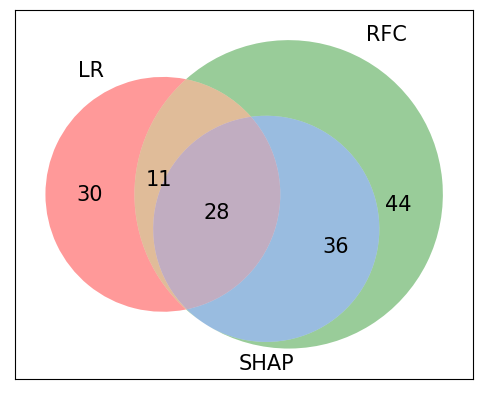

In [ ]:
out = venn3([lr_set, rfc_set, shap_set], ('LR', 'RFC', 'SHAP'))

for text in out.set_labels:
    text.set_fontsize(15)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(15)

plt.gca().set_axis_on()
plt.savefig("venndiagram.png")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26a52daa-3781-4303-b6d1-419771ff77cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>